# Machine Learning on Mushroom Toxicity

### Description of Dataset

This dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended (the latter class was combined with the poisonous class).

### Variables

One binary class divided in edible=e and poisonous=p (with the latter one also containing mushrooms of unknown edibility).

Twenty remaining variables (n: nominal, m: metrical)
1. cap-diameter (m): float number in cm
2. cap-shape (n): bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
3. cap-surface (n): fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
4. cap-color (n): brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k
5. does-bruise-bleed (n): bruises-or-bleeding=t,no=f
6. gill-attachment (n): adnate=a, adnexed=x, decurrent=d, free=e,
sinuate=s, pores=p, none=f, unknown=?
7. gill-spacing (n): close=c, distant=d, none=f
8. gill-color (n): see cap-color + none=f
9. stem-height (m): float number in cm
10. stem-width (m): float number in mm
11. stem-root (n): bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
12. stem-surface (n): see cap-surface + none=f
13. stem-color (n): see cap-color + none=f
14. veil-type (n): partial=p, universal=u
15. veil-color (n): see cap-color + none=f
16. has-ring (n): ring=t, none=f
17. ring-type (n): cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
18. spore-print-color (n): see cap color
19. habitat (n): grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
20. season (n): spring=s, summer=u, autumn=a, winter=w

### Objectives

Identify what features are most commonly associated with poisonous and non-poisonous mushrooms.




## Step 1: Data Cleaning & Preprocessing

In [97]:
# Import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
# Import data
mushrooms = pd.read_csv('Resources/secondary_data_shuffled.csv', sep=';')

In [99]:
# Check the data
mush_cols = mushrooms.columns.to_list()

print(mush_cols)

print(mushrooms.shape)

mushrooms.head()

['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
(61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,1.26,x,g,y,f,d,NaN,w,5.04,...,NaN,t,y,NaN,NaN,f,f,NaN,d,a
1,e,10.32,f,e,b,f,NaN,c,b,4.68,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a
2,p,0.92,x,g,p,f,a,NaN,p,4.59,...,NaN,h,k,NaN,NaN,f,f,NaN,d,u
3,p,4.27,x,NaN,p,f,x,NaN,w,4.55,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,...,NaN,NaN,w,NaN,NaN,f,f,NaN,m,a


In [100]:
# The data must be cleaned, normalized, and standardized prior to modeling 
clean = mushrooms.dropna(axis=1)

clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-color            61069 non-null  object 
 6   stem-height           61069 non-null  float64
 7   stem-width            61069 non-null  float64
 8   stem-color            61069 non-null  object 
 9   has-ring              61069 non-null  object 
 10  habitat               61069 non-null  object 
 11  season                61069 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.6+ MB


## Step 2: Data Exploration & Visualization

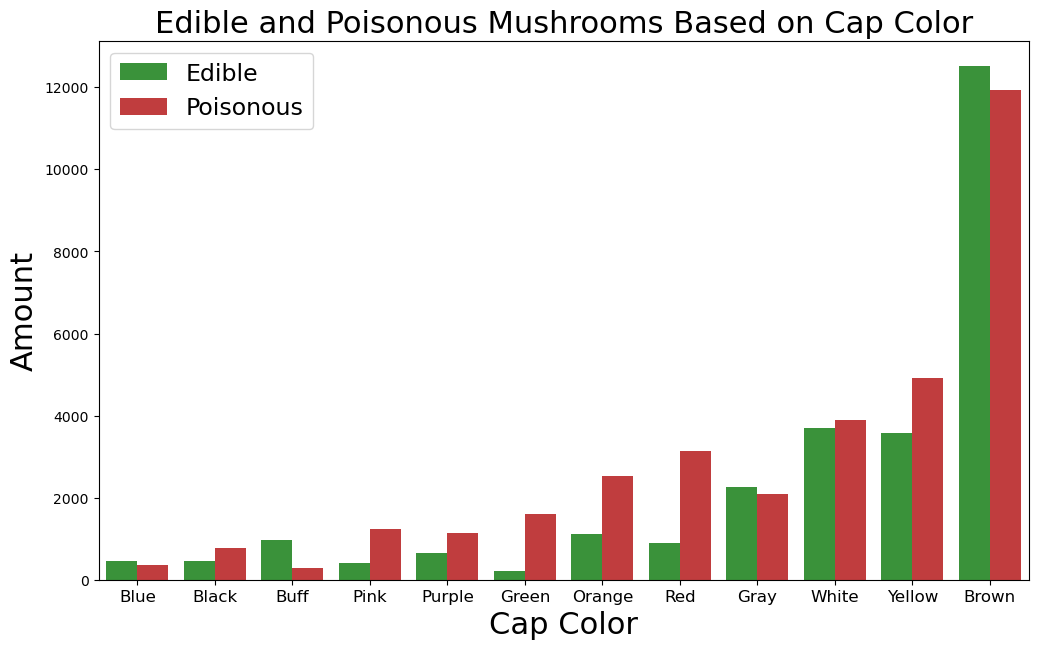

In [101]:
# Check how mushroom color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="cap-color", 
    hue="class", 
    order=clean['cap-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Cap Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Blue',
     'Black',
     'Buff',
     'Pink',
     'Purple',
     'Green',
     'Orange',
     'Red',
     'Gray',
     'White',
     'Yellow',
     'Brown'
     ),fontsize = 12)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

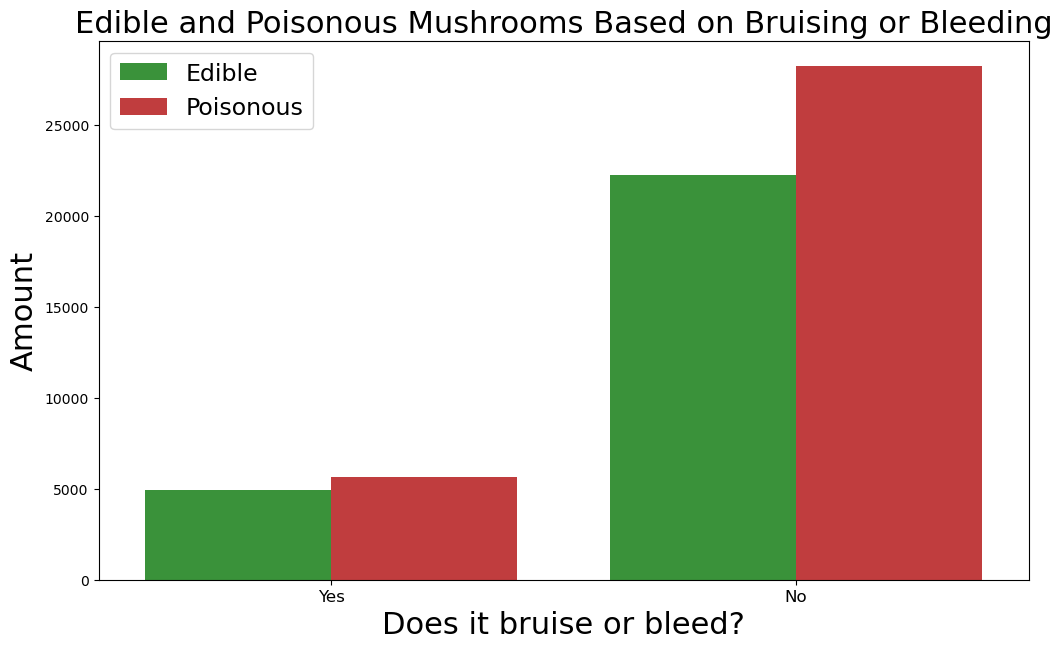

In [102]:
# Check how bruising and bleeding influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Plot data
sns.countplot(
    data=clean, 
    x="does-bruise-or-bleed", 
    hue="class", 
    order=clean['does-bruise-or-bleed'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Does it bruise or bleed?",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Bruising or Bleeding',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Yes',
     'No'
     ),fontsize = 12)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

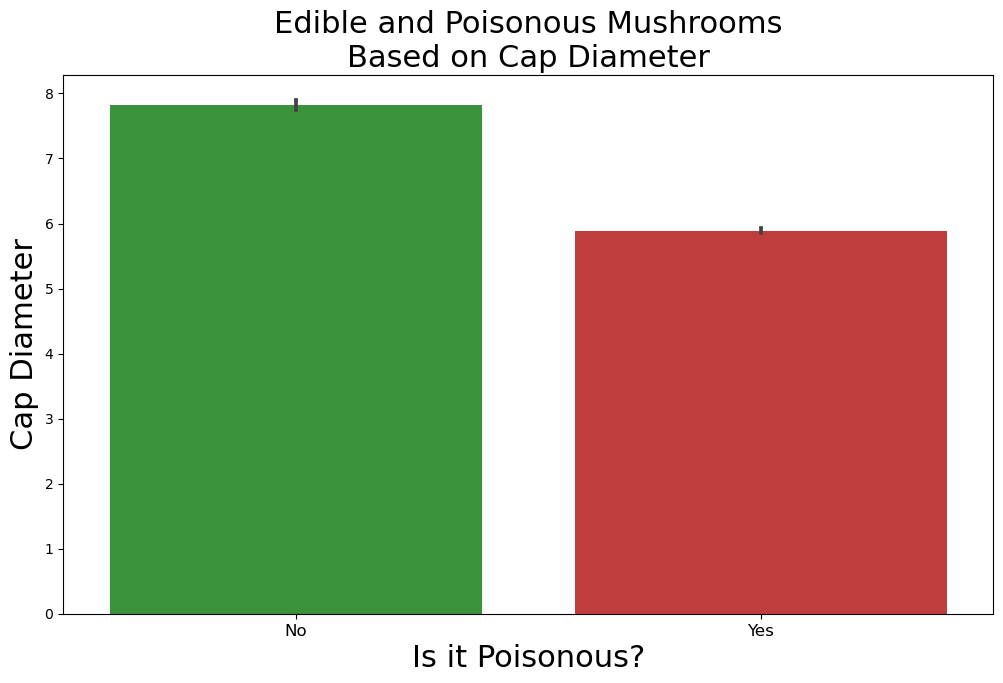

In [103]:
# Check how cap diameter influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="cap-diameter", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=22)

# Set y-axis
ax.set_ylabel('Cap Diameter',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Cap Diameter',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)


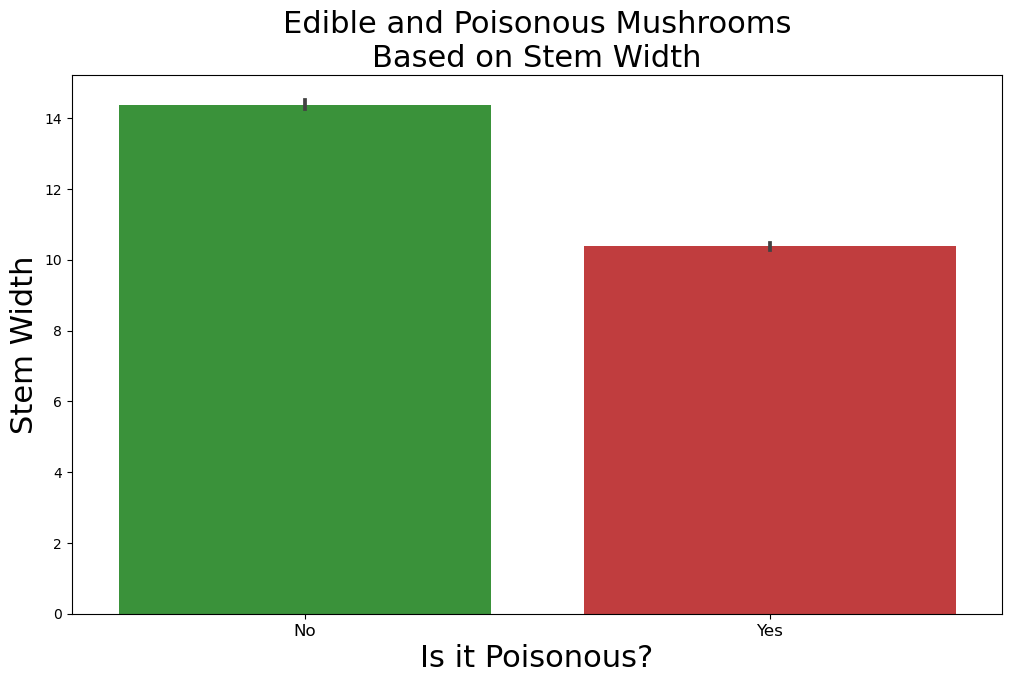

In [104]:
# Check how cap diameter influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="stem-width", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=22)

# Set y-axis
ax.set_ylabel('Stem Width',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Stem Width',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)


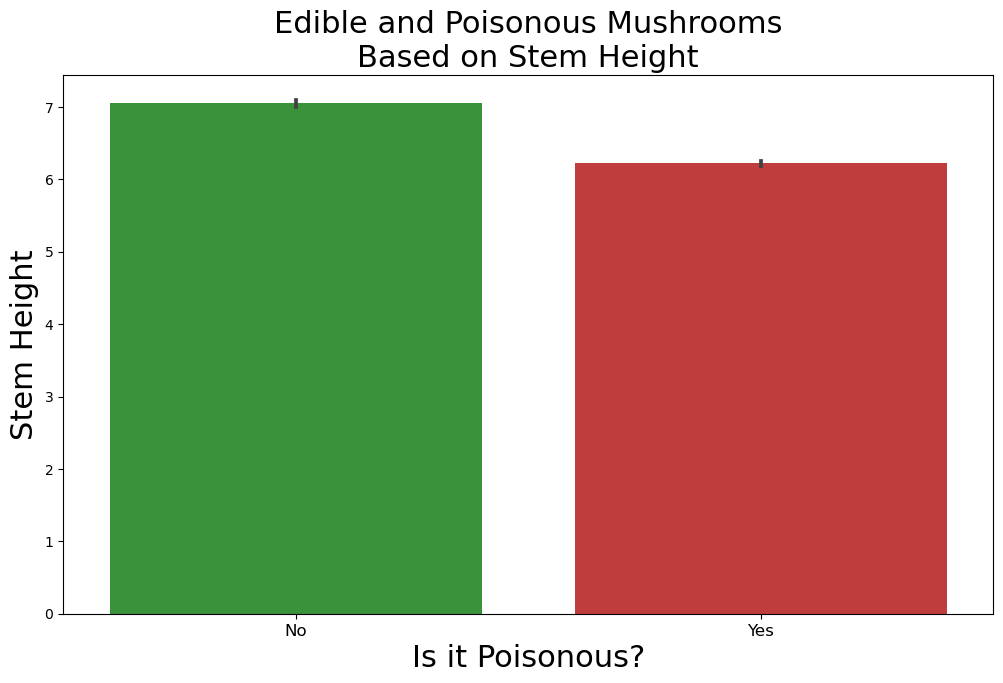

In [105]:
# Check how cap diameter influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Plot data
sns.barplot(data=clean, 
            x="class", 
            y="stem-height", 
            hue="class",
            palette={
                "e":palette[2], 
                "p":palette[3]
                },
            dodge=False,
            estimator=np.mean
            )

# Set x-axis
ax.set_xlabel("Is it Poisonous?",fontsize=22)

# Set y-axis
ax.set_ylabel('Stem Height',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms\nBased on Stem Height',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('No',
     'Yes'
     ),fontsize = 12)

# Remove legend
ax.legend([],[], frameon=False)

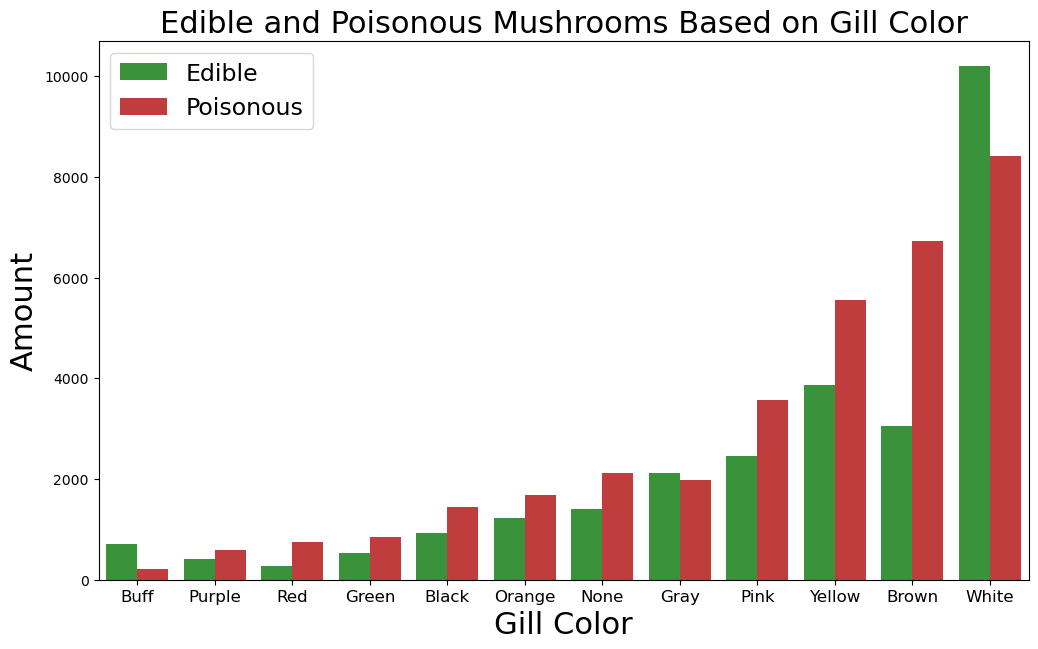

In [108]:
# Check how mushroom color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="gill-color", 
    hue="class", 
    order=clean['gill-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Gill Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Gill Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Buff',
     'Purple',
     'Red',
     'Green',
     'Black',
     'Orange',
     'None',
     'Gray',
     'Pink',
     'Yellow',
     'Brown',
     'White'
     ),fontsize = 12)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

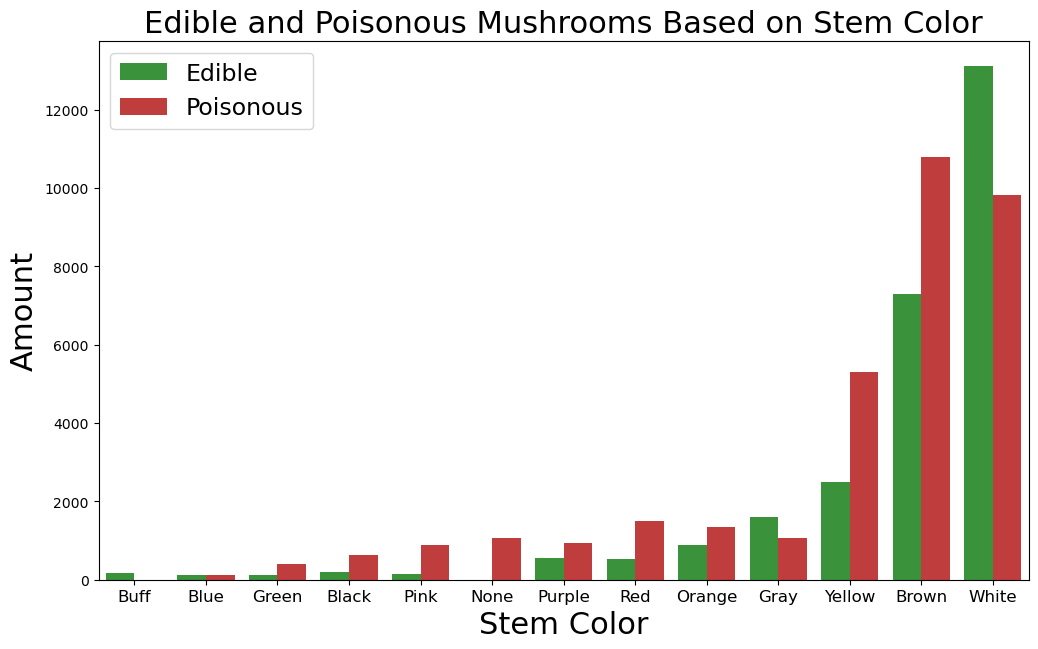

In [111]:
# Check how mushroom color influences whether the mushroom is poisonous or not
fig, ax = plt.subplots(figsize=(12,7))

# Set palette
palette = sns.color_palette()

# Plot data
sns.countplot(
    data=clean, 
    x="stem-color", 
    hue="class", 
    order=clean['stem-color'].value_counts(ascending=True).index, 
    palette={
        "e":palette[2], 
        "p":palette[3]
        }
    )

# Set x-axis
ax.set_xlabel("Stem Color",fontsize=22)

# Set y-axis
ax.set_ylabel('Amount',fontsize=22)

# Add title
ax.set_title('Edible and Poisonous Mushrooms Based on Stem Color',fontsize=22)

# Set x-labels
ax.set_xticklabels(
    ('Buff',
     'Blue',
     'Green',
     'Black',
     'Pink',
     'None',
     'Purple',
     'Red',
     'Orange',
     'Gray',
     'Yellow',
     'Brown',
     'White'
     ),fontsize = 12)

# Set legend
ax.legend(('Edible','Poisonous'),fontsize=17)

## Step 3: Predictive Analyses

### Data Transformation & Set-up

In [79]:
# Ignore slice warnings
import warnings
warnings.filterwarnings("ignore")

# Fetch LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Transform categorical variables to numbers
labelencoder_clean=LabelEncoder()
for column in clean.columns:
    clean[column] = labelencoder_clean.fit_transform(clean[column])
clean.head()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
0,0,84,6,11,0,10,394,119,12,0,0,0
1,0,990,2,0,0,0,358,1890,11,1,0,0
2,1,50,6,7,0,7,349,61,4,0,0,2
3,1,385,6,7,0,10,345,598,11,0,0,0
4,0,266,2,10,0,10,157,464,11,0,4,0


In [80]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = clean["class"]

# Separate the X variable, the features
X = clean.drop(columns="class")

In [81]:
# Review the y variable Series
y.head()

0    0
1    0
2    1
3    1
4    0
Name: class, dtype: int64

In [82]:
# Check the balance of our target values, O is edible 1 is poisonous
y.value_counts()

1    33888
0    27181
Name: class, dtype: int64

In [83]:
# Review the X variable DataFrame
X.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,617.029016,4.032635,6.139776,0.173410,7.340484,547.941263,1139.337209,8.423816,0.248555,0.623180,1.055233
std,426.728908,2.138335,3.165313,0.378605,3.175211,318.111912,894.856713,3.215143,0.432179,1.271238,1.101937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,307.000000,2.000000,5.000000,0.000000,5.000000,354.000000,466.000000,6.000000,0.000000,0.000000,0.000000
50%,547.000000,5.000000,5.000000,0.000000,7.000000,486.000000,964.000000,11.000000,0.000000,0.000000,1.000000
75%,812.000000,6.000000,10.000000,0.000000,10.000000,666.000000,1606.000000,11.000000,0.000000,1.000000,2.000000
max,2563.000000,6.000000,11.000000,1.000000,11.000000,2197.000000,4633.000000,12.000000,1.000000,7.000000,3.000000


If we don't apply scaling, the models will be more influenced by features such as cap shape and color and stem and gill color compared to features like bruises and whether the mushrooms has rings. This is because the former features have a greater impact due to their wider range of choices.

In [84]:
clean.corr()

,class,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,habitat,season
class,1.000000,-0.185401,-0.108724,0.026110,-0.019889,-0.061487,-0.114605,-0.197369,-0.095813,0.057559,-0.049540,-0.061439
cap-diameter,-0.185401,1.000000,0.147757,-0.000133,0.237696,0.232601,0.522804,0.804608,0.051477,0.116059,-0.130896,0.031579
cap-shape,-0.108724,0.147757,1.000000,0.020991,0.192546,0.114409,0.037486,0.169572,0.006356,0.035946,-0.123624,-0.020460
cap-color,0.026110,-0.000133,0.020991,1.000000,0.011434,0.132791,-0.017923,0.008342,0.262380,0.071216,0.027581,0.012157
does-bruise-or-bleed,-0.019889,0.237696,0.192546,0.011434,1.000000,0.023882,0.082551,0.217677,-0.023666,0.019195,-0.102834,-0.051611
gill-color,-0.061487,0.232601,0.114409,0.132791,0.023882,1.000000,0.159796,0.117822,0.144613,-0.055133,-0.079168,-0.003924
stem-height,-0.114605,0.522804,0.037486,-0.017923,0.082551,0.159796,1.000000,0.439350,0.137207,0.283902,-0.024568,-0.018035
stem-width,-0.197369,0.804608,0.169572,0.008342,0.217677,0.117822,0.439350,1.000000,0.083622,0.015006,-0.109901,0.010747
stem-color,-0.095813,0.051477,0.006356,0.262380,-0.023666,0.144613,0.137207,0.083622,1.000000,0.147226,0.044203,-0.016489
has-ring,0.057559,0.116059,0.035946,0.071216,0.019195,-0.055133,0.283902,0.015006,0.147226,1.000000,0.103805,0.035644


We can see from the correlation matrix that the features are mostly uncorrelated.

In [85]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape

(45801, 11)

In [86]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Principal Components Analysis

In [ ]:
# Import the PCA module
from sklearn.decomposition import PCA

### Random Forest

In [87]:
# Import the Random Forest module
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [89]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [90]:
# Check to see model accuracies
print("Training accuracy:", 100*rf_model.score(X_train_scaled,y_train), "%")
print("Test Accuracy:", 100* rf_model.score(X_test_scaled,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 99.59392192821588 %


In [92]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [94]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6760,35
Actual 1,27,8446


Accuracy Score : 0.9959392192821588
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6795
           1       1.00      1.00      1.00      8473

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [95]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17932024906939303, 'stem-width'),
 (0.13522516987441666, 'stem-height'),
 (0.11786011222688562, 'cap-diameter'),
 (0.1116523231810701, 'gill-color'),
 (0.10464504469770634, 'stem-color'),
 (0.09863916848467837, 'cap-color'),
 (0.0818238024676889, 'cap-shape'),
 (0.04968307879656008, 'habitat'),
 (0.04868255774849663, 'does-bruise-or-bleed'),
 (0.046236780588169414, 'has-ring'),
 (0.026231712864934965, 'season')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

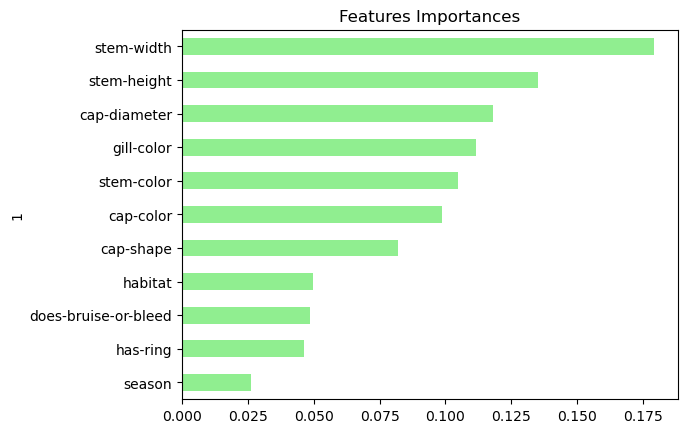

In [96]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

### Logistic Regression

In [ ]:
# Import the Logistic Regression modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score